In [30]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from citipy import citipy
import random
import requests
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"

In [31]:
## Create list of 500 unique cities 
cities=[]


url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

lats = []
temp_f=[]
humidity=[]
cloudiness=[]
wind_speed=[]

dup_count=0
counter = 0
#for counter in range(0,500):
while counter < 500:    
    rand_lat = random.uniform(-90, 90)
    rand_lng = random.uniform(-180, 180)
    #coordinates=(rand_lat,rand_lng)
    city = citipy.nearest_city(rand_lat, rand_lng)
    name = city.city_name
    country= city.country_code
    full_city_name=(f'{name}, {country}')
    # Ensure it is unique cities only
    if name not in cities:
        response = requests.get(query_url +name).json()
        try:
            lat=(response['coord']['lat'])
            cities.append(name)
            lats.append(lat)
            temp_f.append(response['main']['temp'])
            cloudiness.append(response['clouds']['all'])
            humidity.append(response['main']['humidity'])
            wind_speed.append(response['wind']['speed'])
            counter +=1
            print(f'{counter}.{name}')
        except KeyError as e:
            dup_count+=1
            print('City not found. Skipping...')
        lat = None
    #else:
        #print(None)

1.georgetown
2.jamestown
3.rikitea
4.new norfolk
5.atuona
6.ramos arizpe
City not found. Skipping...
7.busselton
8.hermanus
9.albany
10.isangel
11.camalote
12.hobart
13.chuy
14.kahului
15.yellowknife
16.morant bay
17.ribeira grande
18.arraial do cabo
City not found. Skipping...
19.kruisfontein
20.kapuskasing
21.college
22.mataura
23.cidreira
City not found. Skipping...
24.coihaique
25.bredasdorp
26.sobolevo
27.longyearbyen
28.avarua
29.kodiak
30.ostrovnoy
31.mar del plata
City not found. Skipping...
City not found. Skipping...
32.tandil
33.capivari
34.kununurra
35.dikson
36.beloha
37.thompson
38.avera
39.cherskiy
40.puerto ayora
41.murgab
42.santa rosa
43.batsfjord
44.turukhansk
45.broken hill
46.aberdeen
47.hambantota
48.bluff
49.hasaki
50.upernavik
51.narsaq
52.vaini
53.tasiilaq
54.port alfred
55.ushuaia
56.jalu
57.ketou
City not found. Skipping...
58.ponta delgada
59.itabera
60.atyrau
61.ponta do sol
City not found. Skipping...
City not found. Skipping...
62.tura
63.araouane
64.boen

422.nome
City not found. Skipping...
423.bahir dar
424.dusetos
425.bozdar
City not found. Skipping...
426.aroysund
427.mandera
428.alvorada
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
429.shingu
430.yarmouth
431.medeiros neto
432.odienne
City not found. Skipping...
433.powassan
434.requena
435.linjiang
436.eyl
437.caucaia
438.grindavik
439.sangar
440.sovkhoznyy
City not found. Skipping...
441.yenagoa
442.maraba
443.arnissa
City not found. Skipping...
444.pingyin
445.mahon
446.berlevag
447.singaraja
448.kloulklubed
449.kathmandu
450.puerto baquerizo moreno
451.trinidad
City not found. Skipping...
452.ishigaki
453.koumac
454.praia da vitoria
455.nalut
456.sabha
457.dudinka
458.dhoraji
459.ambilobe
460.guerrero negro
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
461.beidao
462.khalkhal
463.puerto carreno
464.yeniseysk
465.ancud
466.ugra
City not found. Skipping...
467.maningrida
City not found. Skipping...
468.b

In [32]:
# Verify there are 500 lats and cities in the lists
len(cities)
#len(lats)
dup_count

118

In [11]:
df = pd.DataFrame({
        'City Name': cities,
        'Latitude': lats,  
        'Temp': temp_f,
        'Humidity': humidity,
        'Cloudiness': cloudiness,
        'Wind Speed': wind_speed,
    })

df=df.sort_values(['Latitude'], ascending=[True])
ordered_cities=df['City Name'].tolist()
ordered_lats=df['Latitude'].tolist()
df.head()
df.to_csv('weather_data.csv')

In [12]:
## Verify values

url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

response = requests.get(query_url +'collie').json()

#(response['coord']['lat'])
#(response['main']['temp'])
#(response['clouds']['all'])
#(response['main']['humidity'])
#(response['wind']['speed'])

In [13]:
# Started with seperate loops for cities, weeded out duplicates
# First had a for loop with counter. Debugged by using while loop for counter <30
# This is rather than using a for loop for counter in range (0,30), which was 30 iterations of counter not the value of the counter

# In a SEPERATE loop, used try/except to see if the city had data associated with it for lat
# Had to append None value to list to keep cities and lats the same length

# A more elegant solution was to only append a city to the cities list if it had data associated with it for lat IN THE SAME LOOP
# this eliminated the need to double check. The If statement filtered for duplicates, and the try statement filtered for cities without data.
# If it errored out on the line that set the value for lat, the city was not added to the list.

# And just moved to the next randomized city. Without this step, cities/lats were paired incorrectly, 
# or the lists of cities/lats were different lenghts, which caused an error when we tried to make a dataframe
# I then ordered the lats, then appended the other metrics in a SEPERATE loop
# Once it was working, just added all the metrics to the same try/except statement as for I did for lat and eliminated the seperate loop

# In summary: start off by breaking it into pieces, then put it together to make it more efficient
# I first had 3 seperate loops to break down the problem and find out what wasn't working.
# This is great for debugging, but not efficient for a final product

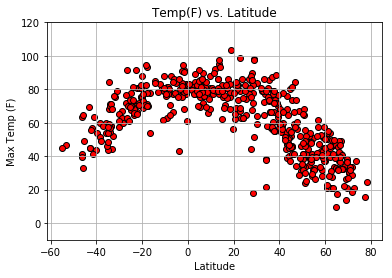

In [26]:
plt.grid()
plt.title("Temp(F) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.ylim((-10), (120))

plt.scatter(lats, temp_f, marker="o", facecolors="red", edgecolors="black")
plt.savefig("Temp(F) vs. Latitude.png")

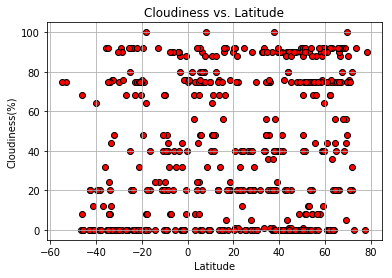

In [27]:
plt.grid()
plt.title("Cloudiness vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.ylim((-5), (105))

plt.scatter(lats, cloudiness, marker="o", facecolors="red", edgecolors="black")
plt.savefig("Cloudiness vs. Latitude.png")

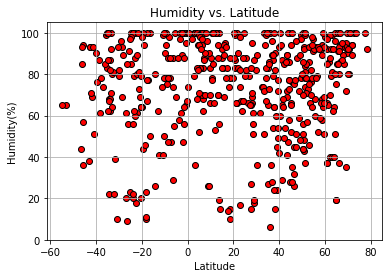

In [28]:
plt.grid()
plt.title("Humidity vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.ylim((0), (105))

plt.scatter(lats, humidity, marker="o", facecolors="red", edgecolors="black")
plt.savefig("Humidity vs. Latitude.png")

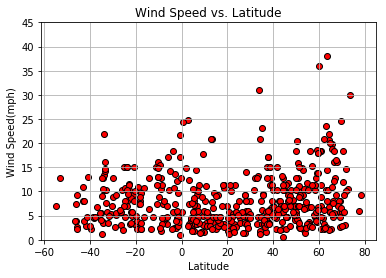

In [29]:
plt.grid()
plt.title("Wind Speed vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.ylim((0), (45))

plt.scatter(lats, wind_speed, marker="o", facecolors="red", edgecolors="black")
plt.savefig("Wind Speed vs. Latitude.png")